# **1. Data Collections & Prepocessing**

In [ ]:
import pandas as pd

file_id = '1f-X9-IUaCyeuyV1-xOj6fbrFV3bclqki'
url = f'https://drive.google.com/uc?id={file_id}'
df = pd.read_excel(url, sheet_name=0)
df_filtered = df[['text']]
print(df_filtered.head())

                                                text
0     siang semua...........\npa kabarr.............
1  ADIK ADIKKU... UJIAN NASIONAL TINGGAL BEBERAPA...
2                                                NaN
3                                   Soal IPA kelas 1
4                         Soal Matematika Kelas 4 SD


In [ ]:
print(df.shape)

(17339, 3)


# **2. Data Preprocessing**

In [ ]:
df_filtered.isnull().sum()

,0
text,690


In [ ]:
df_filtered = df_filtered.dropna()

print(df_filtered.isnull().sum())

text    0
dtype: int64


In [ ]:
print(df_filtered.head())

                                                text
0     siang semua...........\npa kabarr.............
1  ADIK ADIKKU... UJIAN NASIONAL TINGGAL BEBERAPA...
3                                   Soal IPA kelas 1
4                         Soal Matematika Kelas 4 SD
5                            Soal Matematika kelas 3


In [ ]:
import re
import string

import re
import string

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'(.)\1{1,}', r'\1', text)
    text = text.replace('\\t', " ").replace('\\n', " ").replace('\\u', " ").replace('\\', "")
    text = re.sub('[\U00010000-\U0010ffff]', '', text)
    text = ' '.join(re.sub("([@#][A-Za-z0-9_]+)|(\w+:\/\/\S+)", " ", text).split())
    text = re.sub(r'\d+', ' ', text)
    text = text.translate(str.maketrans("", "", string.punctuation))
    text = re.sub(r"\b[a-zA-Z]\b", " ", text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df_filtered['clean_text'] = df_filtered['text'].apply(clean_text)

<>:12: SyntaxWarning: invalid escape sequence '\w'
<>:12: SyntaxWarning: invalid escape sequence '\w'
/tmp/ipython-input-1664478110.py:12: SyntaxWarning: invalid escape sequence '\w'
  text = ' '.join(re.sub("([@#][A-Za-z0-9_]+)|(\w+:\/\/\S+)", " ", text).split())


In [ ]:
import pandas as pd
from nltk.tokenize import word_tokenize
import nltk

nltk.download('punkt_tab')

alay1 = pd.read_csv("https://raw.githubusercontent.com/ramaprakoso/analisis-sentimen/master/kamus/kbba.txt",
                    delimiter="\t", header=None, names=["slang", "formal"])
alay2 = pd.read_csv("https://raw.githubusercontent.com/nasalsabila/kamus-alay/master/colloquial-indonesian-lexicon.csv",
                    usecols=["slang", "formal"])

alay_dict = pd.concat([alay1, alay2], ignore_index=True).dropna()
alay_map = dict(zip(alay_dict['slang'], alay_dict['formal']))

def normalize_slang(text):
    tokens = word_tokenize(text)
    return [alay_map.get(word, word) for word in tokens]

df_filtered['normalized_tokens'] = df_filtered['clean_text'].apply(normalize_slang)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:
from nltk.corpus import stopwords
import nltk

nltk.download('stopwords')

stop_words = set(stopwords.words('indonesian'))
stop_words.update(['nya', 'ya', 'sih', 'deh'])

def remove_stopwords(tokens):
    return [word for word in tokens if word not in stop_words]

df_filtered['filtered_tokens'] = df_filtered['normalized_tokens'].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
!pip install sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stem_tokens(tokens):
    return [stemmer.stem(word) for word in tokens]

df_filtered['stemmed_tokens'] = df_filtered['filtered_tokens'].apply(stem_tokens)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 5.2 MB/s eta 0:00:00


In [ ]:
df_filtered['processed_text'] = df_filtered['stemmed_tokens'].apply(lambda x: ' '.join(x))

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(df_filtered['processed_text'])
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

print("Shape TF-IDF:", X_tfidf.shape)
print(tfidf_df.head())


Shape TF-IDF: (16649, 21104)
    aa   ab  abad  abadi  abadnamanya  abah  abai  abakmie  abalabal  abang  \
0  0.0  0.0   0.0    0.0          0.0   0.0   0.0      0.0       0.0    0.0   
1  0.0  0.0   0.0    0.0          0.0   0.0   0.0      0.0       0.0    0.0   
2  0.0  0.0   0.0    0.0          0.0   0.0   0.0      0.0       0.0    0.0   
3  0.0  0.0   0.0    0.0          0.0   0.0   0.0      0.0       0.0    0.0   
4  0.0  0.0   0.0    0.0          0.0   0.0   0.0      0.0       0.0    0.0   

   ...  zulte  zupa  zurich   zv  zwole   zx  zxocqbrye  zxuamrvk  zxuwzxslh  \
0  ...    0.0   0.0     0.0  0.0    0.0  0.0        0.0       0.0        0.0   
1  ...    0.0   0.0     0.0  0.0    0.0  0.0        0.0       0.0        0.0   
2  ...    0.0   0.0     0.0  0.0    0.0  0.0        0.0       0.0        0.0   
3  ...    0.0   0.0     0.0  0.0    0.0  0.0        0.0       0.0        0.0   
4  ...    0.0   0.0     0.0  0.0    0.0  0.0        0.0       0.0        0.0   

   zykpotm  
0 

In [ ]:
print(df.shape)


(17339, 3)


In [ ]:
df_filtered.head(5000)


,text,clean_text,normalized_tokens,filtered_tokens,stemmed_tokens,processed_text
0,siang semua...........\npa kabarr.............,siang semua pa kabar,"[siang, semua, apa, kabar]","[siang, kabar]","[siang, kabar]",siang kabar
1,ADIK ADIKKU... UJIAN NASIONAL TINGGAL BEBERAPA...,adik adiku ujian nasional tingal beberapa hari...,"[adik, adiku, ujian, nasional, tinggal, bebera...","[adik, adiku, ujian, nasional, tinggal, mari, ...","[adik, adi, uji, nasional, tinggal, mari, giat...",adik adi uji nasional tinggal mari giat ajar s...
3,Soal IPA kelas 1,soal ipa kelas,"[soal, ipa, kelas]","[ipa, kelas]","[ipa, kelas]",ipa kelas
4,Soal Matematika Kelas 4 SD,soal matematika kelas sd,"[soal, matematika, kelas, sd]","[matematika, kelas, sd]","[matematika, kelas, sd]",matematika kelas sd
5,Soal Matematika kelas 3,soal matematika kelas,"[soal, matematika, kelas]","[matematika, kelas]","[matematika, kelas]",matematika kelas
...,...,...,...,...,...,...
5117,RESMI: Timnas Vietnam gagal lolos ke Piala Dun...,resmi timnas vietnam gagal lolos ke piala duni...,"[resmi, timnas, vietnam, gagal, lolos, ke, pia...","[resmi, timnas, vietnam, gagal, lolos, piala, ...","[resmi, timnas, vietnam, gagal, lolos, piala, ...",resmi timnas vietnam gagal lolos piala dunia i...
5118,Momen yang indah. Setelah pertandingan PSG vs ...,momen yang indah setelah pertandingan psg vs a...,"[momen, yang, indah, setelah, pertandingan, ps...","[momen, indah, pertandingan, psg, vs, aston, v...","[momen, indah, tanding, psg, vs, aston, vila, ...",momen indah tanding psg vs aston vila maty cas...
5119,Klub Inter & Nike meluncurkan jersey kolaboras...,klub inter nike meluncurkan jersey kolaborasi ...,"[klub, inter, nike, meluncurkan, jersey, kolab...","[klub, inter, nike, meluncurkan, jersey, kolab...","[klub, inter, nike, luncur, jersey, kolaborasi...",klub inter nike luncur jersey kolaborasi valen...
5120,Sangat menarik,sangat menarik,"[sangat, menarik]",[menarik],[tarik],tarik


# **3. Exploratory Data Analysis (EDA)**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.utils import resample

In [ ]:
# Informasi data
print("Jumlah Baris dan Kolom:", df_filtered.shape)
print("\nTipe Data Setiap Kolom:\n", df_filtered.dtypes)
print("\nJumlah Data Kosong:\n", df_filtered.isnull().sum())

# Tambahkan panjang teks
df_filtered['Review_length'] = df_filtered['processed_text'].apply(lambda x: len(str(x)))
print("\nContoh Review_length:\n", df_filtered[['processed_text', 'Review_length']].head())

# Statistik umum
print("\nStatistik Panjang Teks:")
print("Rata-rata:", df_filtered['Review_length'].mean())
print("Median:", df_filtered['Review_length'].median())
print("Modus:", df_filtered['Review_length'].mode()[0])
print("Standar Deviasi:", df_filtered['Review_length'].std())

Jumlah Baris dan Kolom: (16649, 6)

Tipe Data Setiap Kolom:
 text                 object
clean_text           object
normalized_tokens    object
filtered_tokens      object
stemmed_tokens       object
processed_text       object
dtype: object

Jumlah Data Kosong:
 text                 0
clean_text           0
normalized_tokens    0
filtered_tokens      0
stemmed_tokens       0
processed_text       0
dtype: int64

Contoh Review_length:
                                       processed_text  Review_length
0                                        siang kabar             11
1  adik adi uji nasional tinggal mari giat ajar s...             67
3                                          ipa kelas              9
4                                matematika kelas sd             19
5                                   matematika kelas             16

Statistik Panjang Teks:
Rata-rata: 83.07129557330771
Median: 46.0
Modus: 31
Standar Deviasi: 139.32678813023242


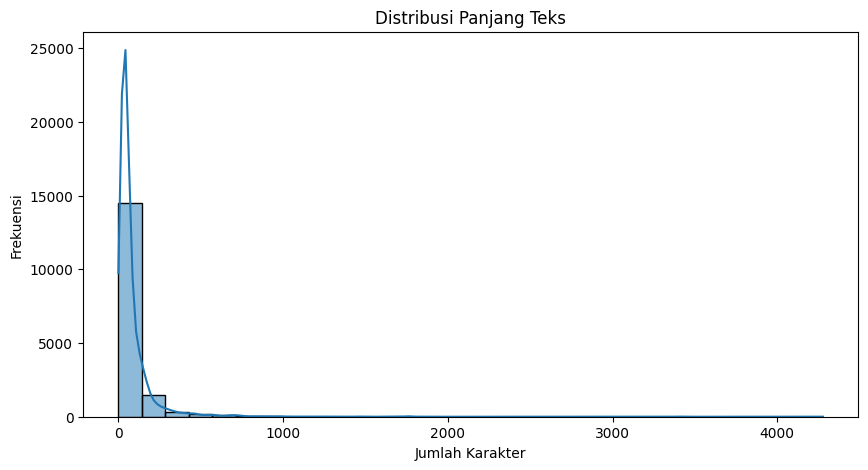

In [ ]:
# Visualisasi distribusi panjang teks
plt.figure(figsize=(10, 5))
sns.histplot(df_filtered['Review_length'], bins=30, kde=True)
plt.title('Distribusi Panjang Teks')
plt.xlabel('Jumlah Karakter')
plt.ylabel('Frekuensi')
plt.show()

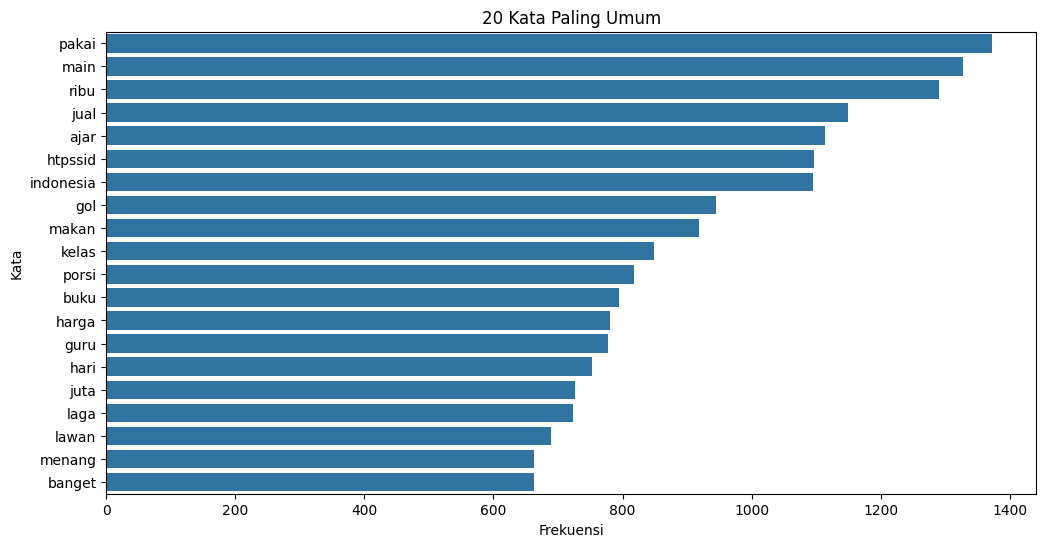

In [ ]:
from collections import Counter

# Gabungkan semua kata
all_words = ' '.join(df_filtered['processed_text']).split()

# Hitung frekuensi
word_freq = Counter(all_words)
common_words = word_freq.most_common(20)

# Visualisasi
words, counts = zip(*common_words)
plt.figure(figsize=(12, 6))
sns.barplot(x=list(counts), y=list(words))
plt.title('20 Kata Paling Umum')
plt.xlabel('Frekuensi')
plt.ylabel('Kata')
plt.show()

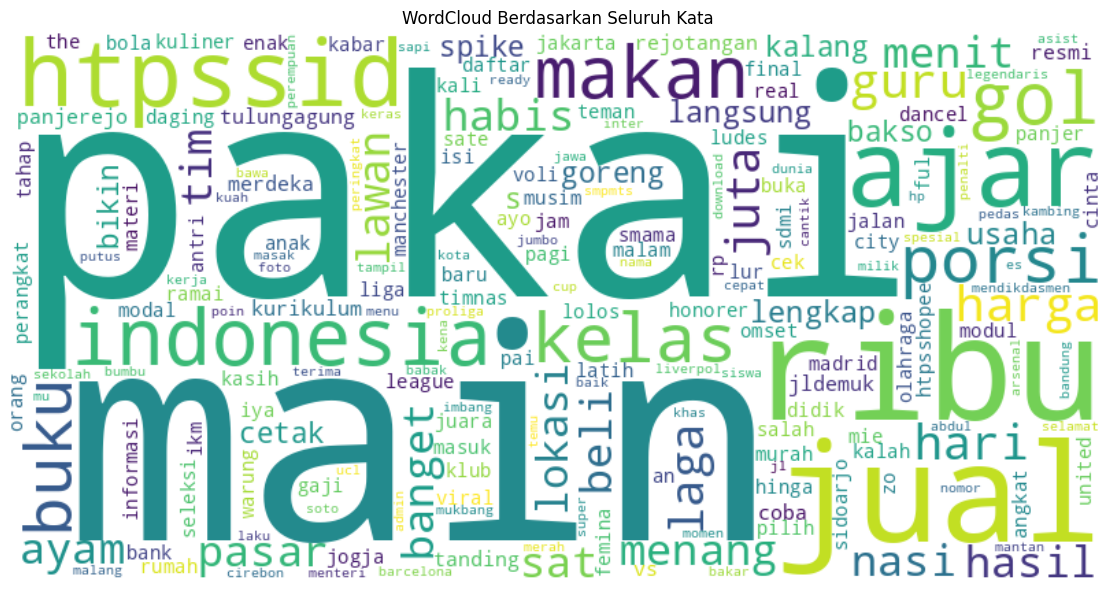

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud Berdasarkan Seluruh Kata')
plt.tight_layout()
plt.show()

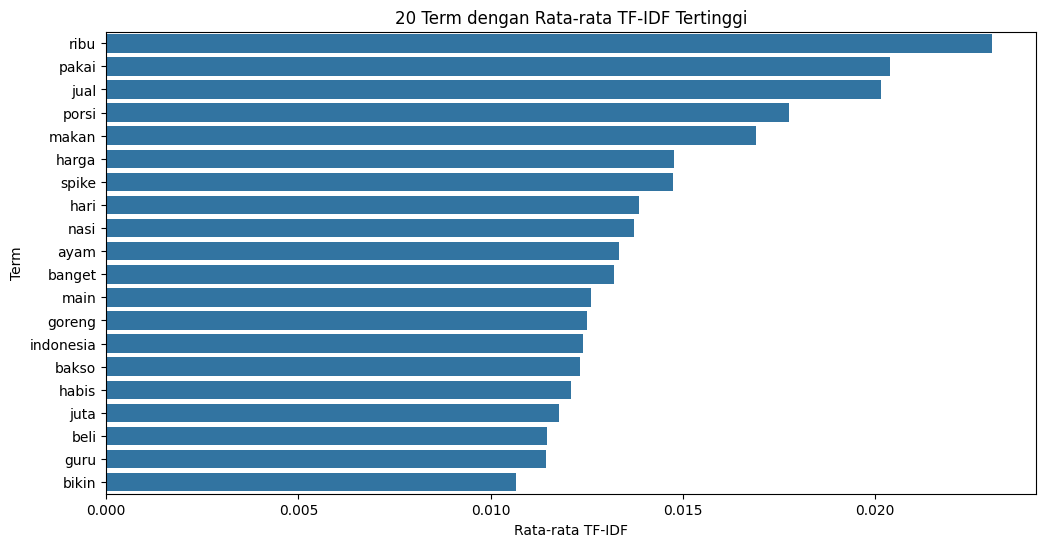

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X_tfidf = tfidf_vectorizer.fit_transform(df_filtered['processed_text'])

# Rata-rata skor TF-IDF per kata
tfidf_means = X_tfidf.mean(axis=0).A1
terms = tfidf_vectorizer.get_feature_names_out()
tfidf_df = pd.DataFrame({'term': terms, 'tfidf': tfidf_means})
top_tfidf = tfidf_df.sort_values(by='tfidf', ascending=False).head(20)

# Visualisasi
plt.figure(figsize=(12, 6))
sns.barplot(data=top_tfidf, x='tfidf', y='term')
plt.title('20 Term dengan Rata-rata TF-IDF Tertinggi')
plt.xlabel('Rata-rata TF-IDF')
plt.ylabel('Term')
plt.show()

# Clustering

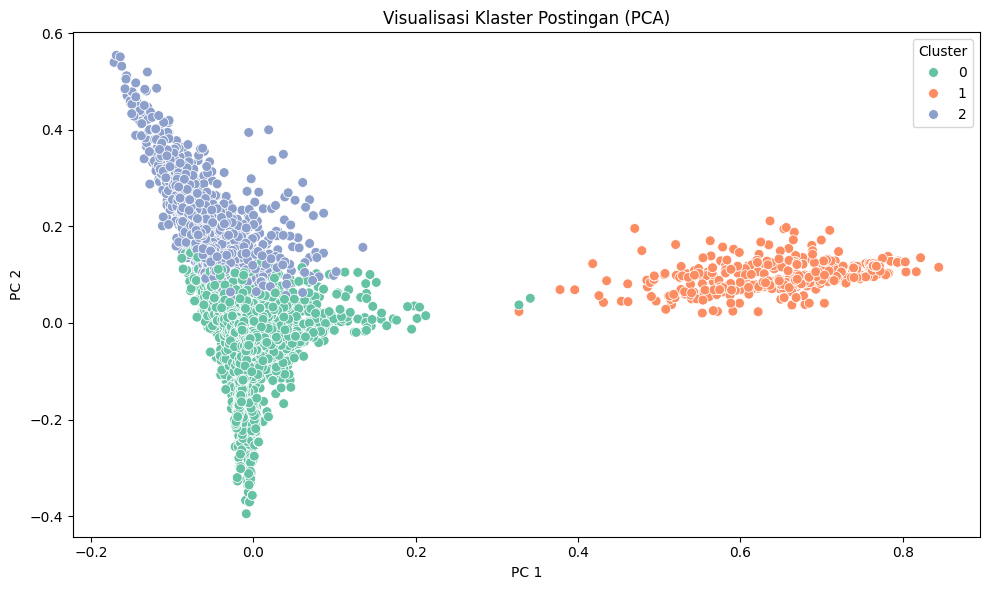


Jumlah data per klaster:
cluster
0    13162
2     2986
1      501
Name: count, dtype: int64

Contoh postingan Cluster 0:
                                       siang kabar
adik adi uji nasional tinggal mari giat ajar su...
                                         ipa kelas
                               matematika kelas sd
                                  matematika kelas

Contoh postingan Cluster 1:
                                       idam kalang
                                       idam kalang
ready laptop asus spek ungul kualitas s        ...
ready realme series juta an nihyuk upgrade hp d...
ready mousepad god bahan lembut barang rapi s  ...

Contoh postingan Cluster 2:
menpan ribu juta lamar daftar pakai honorer sil...
    angkat pakai undur hinga menpan ribu ribu alas
ribu guru terima tunjang sertifikasi kuota pagi...
ribu guru terima tunjang sertifikasi kuota pagi...
           menpan ribu rini banga kerja azwar anas


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. Clustering dengan KMeans
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_tfidf)

# 2. Tambahkan hasil klaster ke DataFrame
df_filtered['cluster'] = clusters

# 3. Reduksi dimensi untuk visualisasi (PCA)
pca = PCA(n_components=2, random_state=42)
X_reduced = pca.fit_transform(X_tfidf.toarray())

# 4. Visualisasi hasil klaster
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_reduced[:, 0], y=X_reduced[:, 1], hue=clusters, palette='Set2', s=50)
plt.title('Visualisasi Klaster Postingan (PCA)')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

# 5. Tampilkan jumlah postingan per klaster
print("\nJumlah data per klaster:")
print(df_filtered['cluster'].value_counts())

# 6. Tampilkan 5 postingan contoh per klaster
for i in range(n_clusters):
    print(f"\nContoh postingan Cluster {i}:")
    print(df_filtered[df_filtered['cluster'] == i]['processed_text'].head(5).to_string(index=False))


In [ ]:
# Buat mapping angka→nama cluster
cluster_names = {
    0: "Pendidikan",
    1: "Hiburan",
    2: "Pemerintahan_Mengajar"
}

# Terapkan mapping ke DataFrame
df_filtered["cluster_name"] = df_filtered["cluster"].map(cluster_names)

# Cek distribusi nama cluster
print(df_filtered["cluster_name"].value_counts())


cluster_name
Pendidikan               13162
Pemerintahan_Mengajar     2986
Hiburan                    501
Name: count, dtype: int64


In [ ]:
for name in cluster_names.values():
    print(f"\nContoh postingan untuk cluster “{name}”:")
    print(
        df_filtered[df_filtered["cluster_name"] == name]
        ["processed_text"]
        .head(5)
        .to_string(index=False)
    )


Contoh postingan untuk cluster “Pendidikan”:
                                       siang kabar
adik adi uji nasional tinggal mari giat ajar su...
                                         ipa kelas
                               matematika kelas sd
                                  matematika kelas

Contoh postingan untuk cluster “Hiburan”:
                                       idam kalang
                                       idam kalang
ready laptop asus spek ungul kualitas s        ...
ready realme series juta an nihyuk upgrade hp d...
ready mousepad god bahan lembut barang rapi s  ...

Contoh postingan untuk cluster “Pemerintahan_Mengajar”:
menpan ribu juta lamar daftar pakai honorer sil...
    angkat pakai undur hinga menpan ribu ribu alas
ribu guru terima tunjang sertifikasi kuota pagi...
ribu guru terima tunjang sertifikasi kuota pagi...
           menpan ribu rini banga kerja azwar anas


            cluster_name    count        mean         std   min    25%    50%  \
0                Hiburan    501.0  129.614770   21.409935  11.0  117.0  129.0   
1  Pemerintahan_Mengajar   2986.0   48.195244   27.977696   4.0   30.0   41.0   
2             Pendidikan  13162.0   89.211822  154.803275   0.0   28.0   47.0   

     75%     max  
0  142.0   199.0  
1   57.0   250.0  
2   87.0  4277.0  


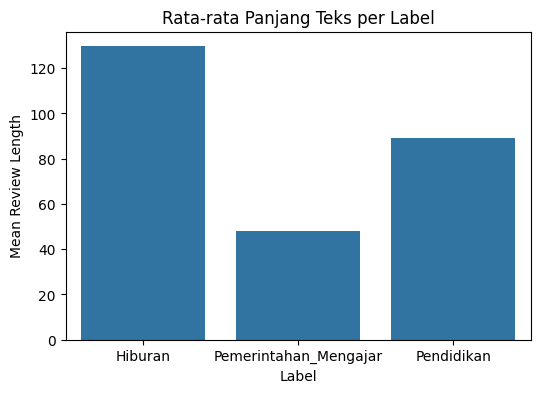

In [ ]:
# 2. Hitung statistik deskriptif per label
stats_per_label = (
    df_filtered
    .groupby('cluster_name')['Review_length']
    .describe()
    .reset_index()
)

print(stats_per_label)

# Barplot rata‑rata
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.barplot(data=stats_per_label, x='cluster_name', y='mean')
plt.title('Rata‑rata Panjang Teks per Label')
plt.xlabel('Label')
plt.ylabel('Mean Review Length')
plt.show()

In [ ]:
# 0. Imports
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense, Dropout, Flatten # Import Flatten
from tensorflow.keras.utils import to_categorical
import tensorflow as tf # Import tensorflow to check version/details if needed


le = LabelEncoder()
y = le.fit_transform(df_filtered['cluster_name'])  # atau kolom label asli jika ada
num_classes = len(le.classes_)

# 3. Split data untuk TF-IDF–based models
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(
    X_tfidf, y, test_size=0.2, random_state=42, stratify=y
)

# ===== Logistic Regression =====
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train_tfidf, y_train)
y_pred_lr = lr.predict(X_test_tfidf)
print("=== Logistic Regression ===")
print(classification_report(y_test, y_pred_lr, target_names=le.classes_))

# ===== Naive Bayes =====
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)
y_pred_nb = nb.predict(X_test_tfidf)
print("=== Multinomial Naive Bayes ===")
print(classification_report(y_test, y_pred_nb, target_names=le.classes_))


=== Logistic Regression ===
                       precision    recall  f1-score   support

              Hiburan       1.00      0.99      0.99       100
Pemerintahan_Mengajar       0.99      0.97      0.98       597
           Pendidikan       0.99      1.00      1.00      2633

             accuracy                           0.99      3330
            macro avg       1.00      0.99      0.99      3330
         weighted avg       0.99      0.99      0.99      3330

=== Multinomial Naive Bayes ===
                       precision    recall  f1-score   support

              Hiburan       1.00      1.00      1.00       100
Pemerintahan_Mengajar       0.82      0.94      0.87       597
           Pendidikan       0.99      0.95      0.97      2633

             accuracy                           0.95      3330
            macro avg       0.93      0.96      0.95      3330
         weighted avg       0.96      0.95      0.95      3330



# **4. Model Machine Learning**

## **4.1 Non-Neural Network**

In [ ]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# 1. Split data (gunakan stratifikasi)
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.3, random_state=42, stratify=y_resampled
)

# 2. Model yang akan dibandingkan
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Naïve Bayes": GaussianNB(),
    "KNN": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=500)
}

# 3. Parameter untuk tuning
param_grids = {
    "Decision Tree": {
        "classifier__max_depth": [3, 5, 10],
        "classifier__criterion": ["gini", "entropy"],
        "classifier__min_samples_split": [2, 5],
        "classifier__min_samples_leaf": [1, 2]
    },
    "Naïve Bayes": {},  # Tidak perlu parameter tuning
    "KNN": {
        "classifier__n_neighbors": [3, 5, 7],
        "classifier__weights": ["uniform", "distance"]
    },
    "Logistic Regression": {
        "classifier__C": [0.1, 1, 10],
        "classifier__solver": ["lbfgs", "liblinear"]
    }
}

# 4. Stratified CV
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 5. Train & Evaluate
results = {}

for model_name, model in models.items():
    print(f"\n🔹 Training model: {model_name}...")

    # Naive Bayes tidak kompatibel dengan sparse matrix, jadi ubah jadi dense
    if model_name == "Naïve Bayes":
        X_train_model = X_train.toarray()
        X_test_model = X_test.toarray()
    else:
        X_train_model = X_train
        X_test_model = X_test

    pipeline = Pipeline([
        ('classifier', model)
    ])

    grid_search = GridSearchCV(pipeline, param_grids[model_name], cv=cv, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train_model, y_train)

    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test_model)

    results[model_name] = {
        "best_params": grid_search.best_params_,
        "accuracy": accuracy_score(y_test, y_pred),
        "classification_report": classification_report(y_test, y_pred)
    }

    print(f"✅ Best Params: {grid_search.best_params_}")
    print(f"✅ Accuracy: {results[model_name]['accuracy']:.2f}")
    print(f"✅ Classification Report:\n{results[model_name]['classification_report']}")


NameError: name 'X_resampled' is not defined

In [ ]:
import joblib

# Simpan TfidfVectorizer
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.pkl')

# Naïve Bayes harus dilatih dengan data dense
nb_model = GaussianNB()
nb_model.fit(X_resampled.toarray(), y_resampled)
joblib.dump(nb_model, 'naive_bayes_model.pkl')

# Logistic Regression (sparse OK)
lr_model = LogisticRegression(max_iter=500)
lr_model.fit(X_resampled, y_resampled)
joblib.dump(lr_model, 'logistic_regression_model.pkl')


In [ ]:
import joblib
import numpy as np

# Load model dan vectorizer
vectorizer = joblib.load('tfidf_vectorizer.pkl')
nb_model = joblib.load('naive_bayes_model.pkl')
lr_model = joblib.load('logistic_regression_model.pkl')

# Contoh teks baru
new_text = "saya dukung indonesia untuk piala dunia"

# Preprocessing sama seperti sebelumnya
def clean_text(text):
    import re, string
    text = text.replace('\\t', " ").replace('\\n', " ").replace('\\u', " ").replace('\\', "")
    text = text.encode('ascii', 'replace').decode('ascii')
    text = ' '.join(re.sub("([@#][A-Za-z0-9_]+)|(\w+:\/\/\S+)", " ", text).split())
    text = re.sub(r'\d+', ' ', text)
    text = text.translate(str.maketrans("", "", string.punctuation))
    text = re.sub(r"\b[a-zA-Z]\b", " ", text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text.lower()

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
stop_words = set(stopwords.words('indonesian'))

def preprocess_text(text):
    cleaned = clean_text(text)
    tokens = word_tokenize(cleaned)
    filtered = [word for word in tokens if word not in stop_words]
    return ' '.join(filtered)

# Preprocessing teks baru
processed = preprocess_text(new_text)

# Transformasi TF-IDF
X_new = vectorizer.transform([processed])

# Prediksi
nb_pred = nb_model.predict(X_new.toarray())[0]
lr_pred = lr_model.predict(X_new)[0]

print("Naïve Bayes Prediction:", nb_pred)
print("Logistic Regression Prediction:", lr_pred)


In [ ]:
from google.colab import files
uploaded = files.upload()


In [ ]:
import pandas as pd
import joblib
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re
import string
import nltk

# Unduh stopwords dan tokenizer jika belum ada
nltk.download('punkt')
nltk.download('stopwords')

# Load file dari path upload
df = pd.read_excel("dataset facebook.xlsx")

# Ambil hanya kolom teks
df = df[['text']]  # Sesuaikan jika nama kolom berbeda
df['text'] = df['text'].astype(str).str.lower()

# Preprocessing
stop_words = set(stopwords.words('indonesian'))

def clean_text(text):
    text = text.replace('\\t', " ").replace('\\n', " ").replace('\\u', " ").replace('\\', "")
    text = text.encode('ascii', 'replace').decode('ascii')
    text = ' '.join(re.sub("([@#][A-Za-z0-9_]+)|(\w+:\/\/\S+)", " ", text).split())
    text = re.sub(r'\d+', ' ', text)
    text = text.translate(str.maketrans("", "", string.punctuation))
    text = re.sub(r"\b[a-zA-Z]\b", " ", text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

def preprocess_text(text):
    cleaned = clean_text(text)
    tokens = word_tokenize(cleaned)
    filtered = [word for word in tokens if word not in stop_words]
    return ' '.join(filtered)

df['processed_text'] = df['text'].apply(preprocess_text)

# Load model dan vectorizer
vectorizer = joblib.load('tfidf_vectorizer.pkl')
nb_model = joblib.load('naive_bayes_model.pkl')
lr_model = joblib.load('logistic_regression_model.pkl')

# Transformasi ke TF-IDF
X = vectorizer.transform(df['processed_text'])

# Prediksi
df['NB_Prediction'] = nb_model.predict(X.toarray())
df['LR_Prediction'] = lr_model.predict(X)

# Simpan hasil
df.to_excel("prediksi_output.xlsx", index=False)
print("✅ Prediksi selesai. File disimpan di: /mnt/data/prediksi_output.xlsx")


## **4.2 Neural Network**

In [ ]:
# Import library yang dibutuhkan untuk Neural Network
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import RandomOverSampler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding, GRU, GlobalMaxPooling1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from sklearn.feature_extraction.text import TfidfVectorizer


from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split



In [ ]:
# 2. Siapkan X_tfidf & y
tfidf = TfidfVectorizer(max_features=2000, stop_words=stop_words_indonesian)
X_tfidf = tfidf.fit_transform(df_filtered['processed_text'])

# Label encoding

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(df_filtered['cluster_name'])
num_classes = len(label_encoder.classes_)

# One-hot
y_onehot = to_categorical(y_encoded)



### **A. ANN (Artificial Neural Network)**

In [ ]:
# 3. Split data
from sklearn.model_selection import train_test_split

X_train_ann, X_test_ann, y_train_ann, y_test_ann = train_test_split(
    X_tfidf, y_onehot,
    test_size=0.2,
    random_state=42,
    stratify=y_encoded
)

# 4. Membangun model ANN

model_ann = Sequential([
    Dense(64, input_shape=(X_train_ann.shape[1],), activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model_ann.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_ann.summary()


In [ ]:

# 5. Training model ANN
print("\nTraining Model ANN...")
history_ann = model_ann.fit(
    X_train_ann, y_train_ann,
    epochs=5,
    batch_size=32,
    validation_split=0.1,
    verbose=1
)

# 6. Evaluasi model ANN
print("\nEvaluasi Model ANN...")
y_pred_ann_prob = model_ann.predict(X_test_ann)
y_pred_ann = np.argmax(y_pred_ann_prob, axis=1)
y_true_ann = np.argmax(y_test_ann, axis=1)

report_ann = classification_report(y_true_ann, y_pred_ann, target_names=label_encoder.classes_, output_dict=True)
print(classification_report(y_true_ann, y_pred_ann, target_names=label_encoder.classes_))

In [ ]:
# Hitung akurasi pada data latih
loss_train, accuracy_train = model_ann.evaluate(X_train_ann, y_train_ann, verbose=0)

# Hitung akurasi pada data uji (Anda sudah punya ini, tapi kita hitung ulang untuk perbandingan)
loss_test, accuracy_test = model_ann.evaluate(X_test_ann, y_test_ann, verbose=0)
print("1. ANN")
print(f"Akurasi Data Latih: {accuracy_train * 100:.2f}%")
print(f"Akurasi Data Uji:   {accuracy_test * 100:.2f}%")

# Analisis
if accuracy_train > (accuracy_test + 0.1): # Toleransi gap 10%
    print("\nKESIMPULAN: Terindikasi adanya OVERFITTING.")
else:
    print("\nKESIMPULAN: Model Anda GOOD FIT, tidak terlihat overfitting yang signifikan.")

### **B. GRU**

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from imblearn.over_sampling import RandomOverSampler
from tensorflow.keras.utils import to_categorical

# Tokenizer dan padding
tokenizer_gru = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer_gru.fit_on_texts(df_filtered['processed_text'])  # atau df_no_outlier jika sudah diproses
X_sequences = tokenizer_gru.texts_to_sequences(df_filtered['processed_text'])
X_padded = pad_sequences(X_sequences, maxlen=100, padding='post', truncating='post')

# Oversampling
ros_gru = RandomOverSampler(random_state=42)
X_resampled_seq, y_resampled_gru = ros_gru.fit_resample(X_padded, y_encoded)
y_resampled_gru_ohe = to_categorical(y_resampled_gru, num_classes=num_classes)


In [ ]:
# 3. Split data
# Benar: data hasil oversampling
X_train_gru, X_test_gru, y_train_gru, y_test_gru = train_test_split(
     X_resampled_seq, y_resampled_gru_ohe,
    test_size=0.2,
    random_state=42,
    stratify=y_resampled_gru
)



In [ ]:
# 4. Membangun model GRU
max_words = 10000
maxlen = 100
model_gru = Sequential([
    Embedding(input_dim=max_words, output_dim=128, input_length=maxlen),
    GRU(64, return_sequences=False),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model_gru.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_gru.summary()

# 5. Training model GRU
print("\nTraining Model GRU...")
history_gru = model_gru.fit(
    X_train_gru, y_train_gru,
    epochs=5,
    batch_size=32,
    validation_split=0.1,
    verbose=1
)



In [ ]:
# 6. Evaluasi model GRU
print("\nEvaluasi Model GRU...")
y_pred_gru_prob = model_gru.predict(X_test_gru)
y_pred_gru = np.argmax(y_pred_gru_prob, axis=1)
y_true_gru = np.argmax(y_test_gru, axis=1)

report_gru = classification_report(y_true_gru, y_pred_gru, target_names=label_encoder.classes_, output_dict=True)
print(classification_report(y_true_gru, y_pred_gru, target_names=label_encoder.classes_))


In [ ]:
# Hitung akurasi pada data latih
loss_train, accuracy_train = model_gru.evaluate(X_train_gru, y_train_gru, verbose=0)

# Hitung akurasi pada data uji (Anda sudah punya ini, tapi kita hitung ulang untuk perbandingan)
loss_test, accuracy_test = model_gru.evaluate(X_test_gru, y_test_gru, verbose=0)
print("2. GRU")
print(f"Akurasi Data Latih: {accuracy_train * 100:.2f}%")
print(f"Akurasi Data Uji:   {accuracy_test * 100:.2f}%")

# Analisis
if accuracy_train > (accuracy_test + 0.1): # Toleransi gap 10%
    print("\nKESIMPULAN: Terindikasi adanya OVERFITTING.")
else:
    print("\nKESIMPULAN: Model Anda GOOD FIT, tidak terlihat overfitting yang signifikan.")

## **Hasil**

In [ ]:
print("\n" + "="*60)
print("PERBANDINGAN EVALUASI MODEL NEURAL NETWORK")
print("="*60)

# Ambil metrik 'macro avg' untuk perbandingan yang adil antar kelas
metrics = ['precision', 'recall', 'f1-score']
results = {
    'ANN': {metric: report_ann['macro avg'][metric] for metric in metrics},
    'GRU': {metric: report_gru['macro avg'][metric] for metric in metrics}
}
results['ANN']['accuracy'] = report_ann['accuracy']
results['GRU']['accuracy'] = report_gru['accuracy']

# Tampilkan dalam DataFrame
df_results = pd.DataFrame(results).T
df_results = df_results[['accuracy', 'precision', 'recall', 'f1-score']]

print(df_results)

In [ ]:
import numpy as np
import re
import string
from nltk.tokenize import word_tokenize
import tensorflow as tf # Diperlukan untuk tf.keras.preprocessing

def preprocess_text_for_prediction(text, alay_map, stop_words, stemmer):
    # 1. Cleaning
    text = str(text).lower()
    text = re.sub(r'(.)\1{2,}', r'\1', text)
    text = text.replace('\\t', " ").replace('\\n', " ").replace('\\u', " ").replace('\\', "")
    text = re.sub('[\U00010000-\U0010ffff]', '', text)
    text = ' '.join(re.sub("([@#][A-Za-z0-9_]+)|(\w+:\/\/\S+)", " ", text).split())
    text = re.sub(r'\d+', ' ', text)
    text = text.translate(str.maketrans("", "", string.punctuation))
    text = re.sub(r"\b[a-zA-Z]\b", " ", text)
    text = re.sub(r'\s+', ' ', text).strip()
    # 2. Normalisasi Slang
    tokens = word_tokenize(text)
    normalized_tokens = [alay_map.get(word, word) for word in tokens]
    # 3. Stopword Removal
    filtered_tokens = [word for word in normalized_tokens if word not in stop_words]
    # 4. Stemming
    stemmed_tokens = [stemmer.stem(word) for word in filtered_tokens]
    return ' '.join(stemmed_tokens)

def test_and_predict(kalimat):
    print(f"\nAnalisis untuk: '{kalimat}'")
    print("-" * 30)
    processed_text = preprocess_text_for_prediction(kalimat, alay_map, stop_words, stemmer)
    print(f"Teks Setelah Preprocessing: '{processed_text}'\n")

    # Prediksi Model ANN
    X_ann_test = tfidf_vectorizer_ann.transform([processed_text])
    pred_ann_prob = model_ann.predict(X_ann_test.toarray())
    pred_ann_index = np.argmax(pred_ann_prob)
    pred_ann_label = label_encoder.inverse_transform([pred_ann_index])[0]
    print(f"🤖 Prediksi Model ANN: {pred_ann_label.upper()} ({np.max(pred_ann_prob)*100:.2f}%)")

    # Prediksi Model GRU
    X_gru_test_seq = tokenizer_gru.texts_to_sequences([processed_text])
    X_gru_test_pad = tf.keras.preprocessing.sequence.pad_sequences(X_gru_test_seq, maxlen=maxlen, padding='post', truncating='post')
    pred_gru_prob = model_gru.predict(X_gru_test_pad)
    pred_gru_index = np.argmax(pred_gru_prob)
    pred_gru_label = label_encoder.inverse_transform([pred_gru_index])[0]
    print(f"🧠 Prediksi Model GRU: {pred_gru_label.upper()} ({np.max(pred_gru_prob)*100:.2f}%)")


while True:
    # Meminta input dari pengguna
    kalimat_user = input("Masukkan kalimat yang ingin diuji (atau ketik 'exit' untuk keluar): ")

    # Cek kondisi untuk berhenti
    if not kalimat_user.strip() or kalimat_user.lower() in ['exit', 'quit']:
        print("\nTerima kasih telah mencoba! Program berhenti.")
        break

    # Panggil fungsi untuk memproses dan memprediksi kalimat
    test_and_predict(kalimat_user)

In [ ]:
from google.colab import files
import io

# --- Pastikan semua objek ini sudah ada di memori dari sel-sel sebelumnya ---
# model_ann, model_gru, tfidf_vectorizer_ann, tokenizer_gru,
# label_encoder, stemmer, alay_map, stop_words, maxlen,
# preprocess_text_for_prediction (fungsi)


def predict_with_uploaded_dataset():
    """
    Fungsi untuk mengunggah dataset, melakukan prediksi dengan model ANN & GRU,
    dan mengunduh hasilnya secara otomatis.
    """
    try:
        # 1. Mengunggah File
        print("Silakan unggah file Excel Anda...")
        uploaded = files.upload()

        if not uploaded:
            print("\nProses dibatalkan. Tidak ada file yang diunggah.")
            return

        # Ambil nama file dan baca datanya
        filename = next(iter(uploaded))
        df_new = pd.read_excel(io.BytesIO(uploaded[filename]))
        print(f"\n✅ File '{filename}' berhasil diunggah. Jumlah baris: {len(df_new)}")
        print("\nKolom yang tersedia:", df_new.columns.tolist())

        # 2. Meminta Nama Kolom Teks dari Pengguna
        text_column = ''
        while text_column not in df_new.columns:
            text_column = input(f"\nMasukkan nama kolom yang berisi teks untuk diuji: ")
            if text_column not in df_new.columns:
                print(f"⚠️ Kolom '{text_column}' tidak ditemukan. Silakan coba lagi.")

        # 3. Preprocessing Teks
        print("\nMemulai proses preprocessing teks...")
        # Membuat salinan untuk menghindari SettingWithCopyWarning
        df_predict = df_new.copy()
        df_predict['processed_text'] = df_predict[text_column].astype(str).apply(
            lambda x: preprocess_text_for_prediction(x, alay_map, stop_words, stemmer)
        )
        print("✅ Preprocessing selesai.")

        # 4. Prediksi dengan Model ANN
        print("\nMelakukan prediksi dengan Model ANN...")
        X_ann_new = tfidf_vectorizer_ann.transform(df_predict['processed_text'])
        pred_ann_prob = model_ann.predict(X_ann_new.toarray())
        pred_ann_indices = np.argmax(pred_ann_prob, axis=1)
        df_predict['Prediksi_ANN'] = label_encoder.inverse_transform(pred_ann_indices)
        print("✅ Prediksi ANN selesai.")

        # 5. Prediksi dengan Model GRU
        print("\nMelakukan prediksi dengan Model GRU...")
        X_gru_new_seq = tokenizer_gru.texts_to_sequences(df_predict['processed_text'])
        X_gru_new_pad = tf.keras.preprocessing.sequence.pad_sequences(X_gru_new_seq, maxlen=maxlen, padding='post', truncating='post')
        pred_gru_prob = model_gru.predict(X_gru_new_pad)
        pred_gru_indices = np.argmax(pred_gru_prob, axis=1)
        df_predict['Prediksi_GRU'] = label_encoder.inverse_transform(pred_gru_indices)
        print("✅ Prediksi GRU selesai.")

        # 6. Menyiapkan File Hasil dan Mengunduh
        # Buat dataframe hasil yang rapi
        df_hasil = df_predict[[text_column, 'Prediksi_ANN', 'Prediksi_GRU']]
        output_filename = f"hasil_prediksi_{filename}"

        print(f"\nMenyimpan hasil ke file '{output_filename}' dan memulai unduhan...")
        df_hasil.to_excel(output_filename, index=False)
        files.download(output_filename)
        print("\n🎉 Proses selesai! File hasil telah diunduh.")

    except Exception as e:
        print(f"\nTerjadi kesalahan: {e}")

# --- Panggil fungsi untuk menjalankan keseluruhan proses ---
predict_with_uploaded_dataset()

In [ ]:

# 1. TF-IDF
tfidf_vectorizer_ann = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vectorizer_ann.fit_transform(df_no_outlier['processed_text'])

# 2. Oversampling
ros = RandomOverSampler(random_state=42)
X_resampled_tfidf, y_resampled = ros.fit_resample(X_tfidf, y_encoded)
y_resampled_ohe = to_categorical(y_resampled, num_classes=num_classes)

print("\nDistribusi label setelah oversampling (data TF-IDF):")
print(pd.Series(y_resampled).value_counts())

In [ ]:
# 1. Feature Engineering: Tokenizer dan Padding
max_words = 10000
maxlen = 100

tokenizer_gru = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer_gru.fit_on_texts(df_no_outlier['processed_text'])
X_sequences = tokenizer_gru.texts_to_sequences(df_no_outlier['processed_text'])
X_padded = pad_sequences(X_sequences, maxlen=maxlen, padding='post', truncating='post')

# 2. Oversampling
ros_gru = RandomOverSampler(random_state=42)
X_resampled_seq, y_resampled_gru = ros_gru.fit_resample(X_padded, y_encoded)
y_resampled_gru_ohe = to_categorical(y_resampled_gru, num_classes=num_classes)

print("\nDistribusi label setelah oversampling (data Sekuens):")
print(pd.Series(y_resampled_gru).value_counts())



In [ ]:
from imblearn.over_sampling import SMOTE

# Resample the data using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_tfidf, df_filtered['cluster_name'])

print("Shape of original data:", X_tfidf.shape, df_filtered['cluster_name'].shape)
print("Shape of resampled data:", X_resampled.shape, y_resampled.shape)